<a href="https://colab.research.google.com/github/s-brez/openintro-statistics/blob/master/Ch4_Distributions_of_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

##NORMAL (GAUSSIAN) DIST 1
Z-score normalisation with multiple samples.

**Z = (observation - mean) / std dev.**

**use st.norm.cdf(zscore)** or **st.norm.ppf(probability/percentile)**


A. Find and interpret z-scores for both observations

B. Which one ranks better, given a a lower observation (faster finish) is better.

C. What percentage of of other runners did A (Mark) finish faster than? (find the area under the curve to the right of marks z-score)

D. What percentage of of other runners did B (Jane) finish faster than? (find the area under the curve to the right of janes z-score)


In [0]:
var_a, var_b = 221, 246
mean_a, mean_b = 181, 224
stddev_a, stddev_b = 35, 46
zscore_a = round((var_a - mean_a) / stddev_a, 2)
zscore_b = round((var_b - mean_b) / stddev_b, 2)

print("A: Mark's z-score:", zscore_a, "Mark finished", zscore_a, "std dev's avove his groups mean finish time.")
print("   Janes z-score", zscore_b, "Jane finished", zscore_b, "std dev's avove her groups mean finish time.")

print("\nB: Jane ranks better than Mark as her z-score is lower than his,")
print("   indicating her finish time is relatively shorter.")

print("\nC: P(Z > 1.14) = 1 - P(Z < 1.14) =", 1 - round(st.norm.cdf(zscore_a), 4))
print("Mark finished faster than", (1 - round(st.norm.cdf(zscore_a), 4))*100, "% of his group.")

print("\nD: P(Z > 0.48) = 1 - P(Z < 0.48) =", 1 - round(st.norm.cdf(zscore_b), 4))
print("Jane finished faster than", (1 - round(st.norm.cdf(zscore_b), 4))*100, "% of her group.")

print("\nE:  If the finish time distributions were not normal, the answers to A would be the same",
      "because we can find z-scores for non-normal distribtions. We would not be able to answe",
      "C and D since we cant use a z-table to find proabilities without a normal distribution.")

A: Mark's z-score: 1.14 Mark finished 1.14 std dev's avove his groups mean finish time.
   Janes z-score 0.48 Jane finished 0.48 std dev's avove her groups mean finish time.

B: Jane ranks better than Mark as her z-score is lower than his,
   indicating her finish time is relatively shorter.

C: P(Z > 1.14) = 1 - P(Z < 1.14) = 0.1271
Mark finished faster than 12.709999999999999 % of his group.

D: P(Z > 0.48) = 1 - P(Z < 0.48) = 0.3156
Jane finished faster than 31.56 % of her group.

E:  If the finish time distributions were not normal, the answers to A would be the same because we can find z-scores for non-normal distribtions. We would not be able to answe C and D since we cant use a z-table to find proabilities without a normal distribution.


## BINOMIAL DIST
35% of adults at a school do not want to work while on vacation. In a random sample of 10 adults, let x represent the number who do not work on vacation.

**P(k successes in n trials) = (n choose k) p^k (1-p)^(n-k)**

**use scipy.special comb for n choose k**

A: What represents a "success" for this experiment?

B: What is the value of p for this experiment?

C: Find P(x=3)

D: Find P(0 or 1 or 2 adults out of ten didnt work during vacation)




In [0]:
from scipy.special import comb

print("A: An adult not working on vaction.")

print("\nB: p is 0.35 (probability of successful trial) ")

n, p, k = 10, 0.35, 3
print("\nC: P(x = 3) =", round(comb(n, k)* (p**k) * ((1-p)**(n-k)), 3))

print(
    "\nD: P(x <= 2)=", round(comb(10, 0)*(0.35**0)*(0.65**10) +
      comb(10, 1)*(0.35**1)*(0.65**9) + comb(10, 2)*(0.35**2)*(0.65**8), 3))

A: An adult not working on vaction.

B: p is 0.35 (probability of successful trial) 

C: P(x = 3) = 0.252

D: P(x <= 2)= 0.262


##POISSON DIST
From Mon-Thurs, the average number of vehicles to visit a store between 2 and 3pm each day is 6.5, with the number of cars showing up following a poisson distribution.

**P(observe *k* events) = (lam^k * e^-k) / !k)**

**use poisson from scipy.stats**

A: Find P(5 cars show up next monday)

B: Find P(0 or 1 or 2 cars show up next monday)

In [0]:
from scipy.stats import poisson
import math

lm = 6.5
k = 5

print("A:", round(poisson.pmf(5, 6.5), 4))

print("B:", round(poisson.pmf(0, 6.5), 4) +
      round(poisson.pmf(1, 6.5), 4) + round(poisson.pmf(2, 6.5), 4))


A: 0.1454
B: 0.0431


##NORMAL (GAUSSIAN) DIST 2
Suppose weights of the checked baggage of airline passengers follow a nearly normal distribution with mean 45 pounds and standard deviation 3.2 pounds. Most airlines charge a fee for baggage that weigh in excess of 50 pounds. Determine what percent of airline passengers incur this fee. (find the area to the right of the 50lb z-score.

In [0]:
mean = 45
sd = 3.2
x = 50
x_zscore = (x - mean) / sd

print("50 pound baggage lies", x_zscore, 'std deviations away from the mean baggage weight.')
print("P(Z > 1.56) = 1 - P(Z < 1.56 =", round(1 - st.norm.cdf(x_zscore), 4))
print(round((1 - st.norm.cdf(x_zscore))*100, 4), "% of passengers pay the fee.")

50 pound baggage lies 1.5625 std deviations away from the mean baggage weight.
P(Z > 1.56) = 1 - P(Z < 1.56 = 0.0591
5.9085 % of passengers pay the fee.


### BDIMS Data
A. Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?

B: Make a normal probability plot of men's heights and a normal probability plot of women's heights. Do all of the points fall on the line?


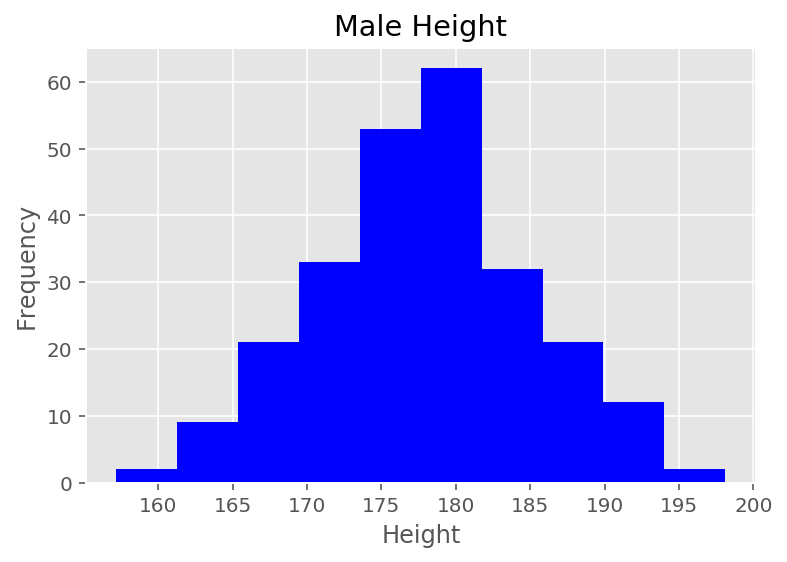

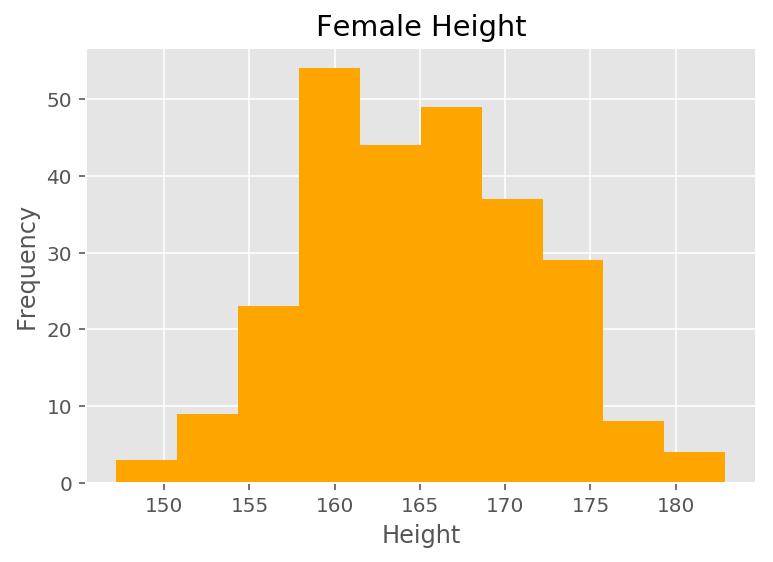

A: Both distributions approximately follow the normal distribution. Average height is higher for men.


In [0]:

import numpy as np
import pandas as pd
from scipy.stats import probplot

bdims = pd.read_csv('https://www.openintro.org/stat/data/bdims.csv')

# Create two subsets for male and female data.
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

plt.hist(mdims['hgt'], color = 'blue')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Male Height')
plt.show()

plt.hist(fdims['hgt'], color = 'orange')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Female Height')
plt.show()

print("A: Both distributions approximately follow the normal distribution.",
    "Average height is higher for men.")


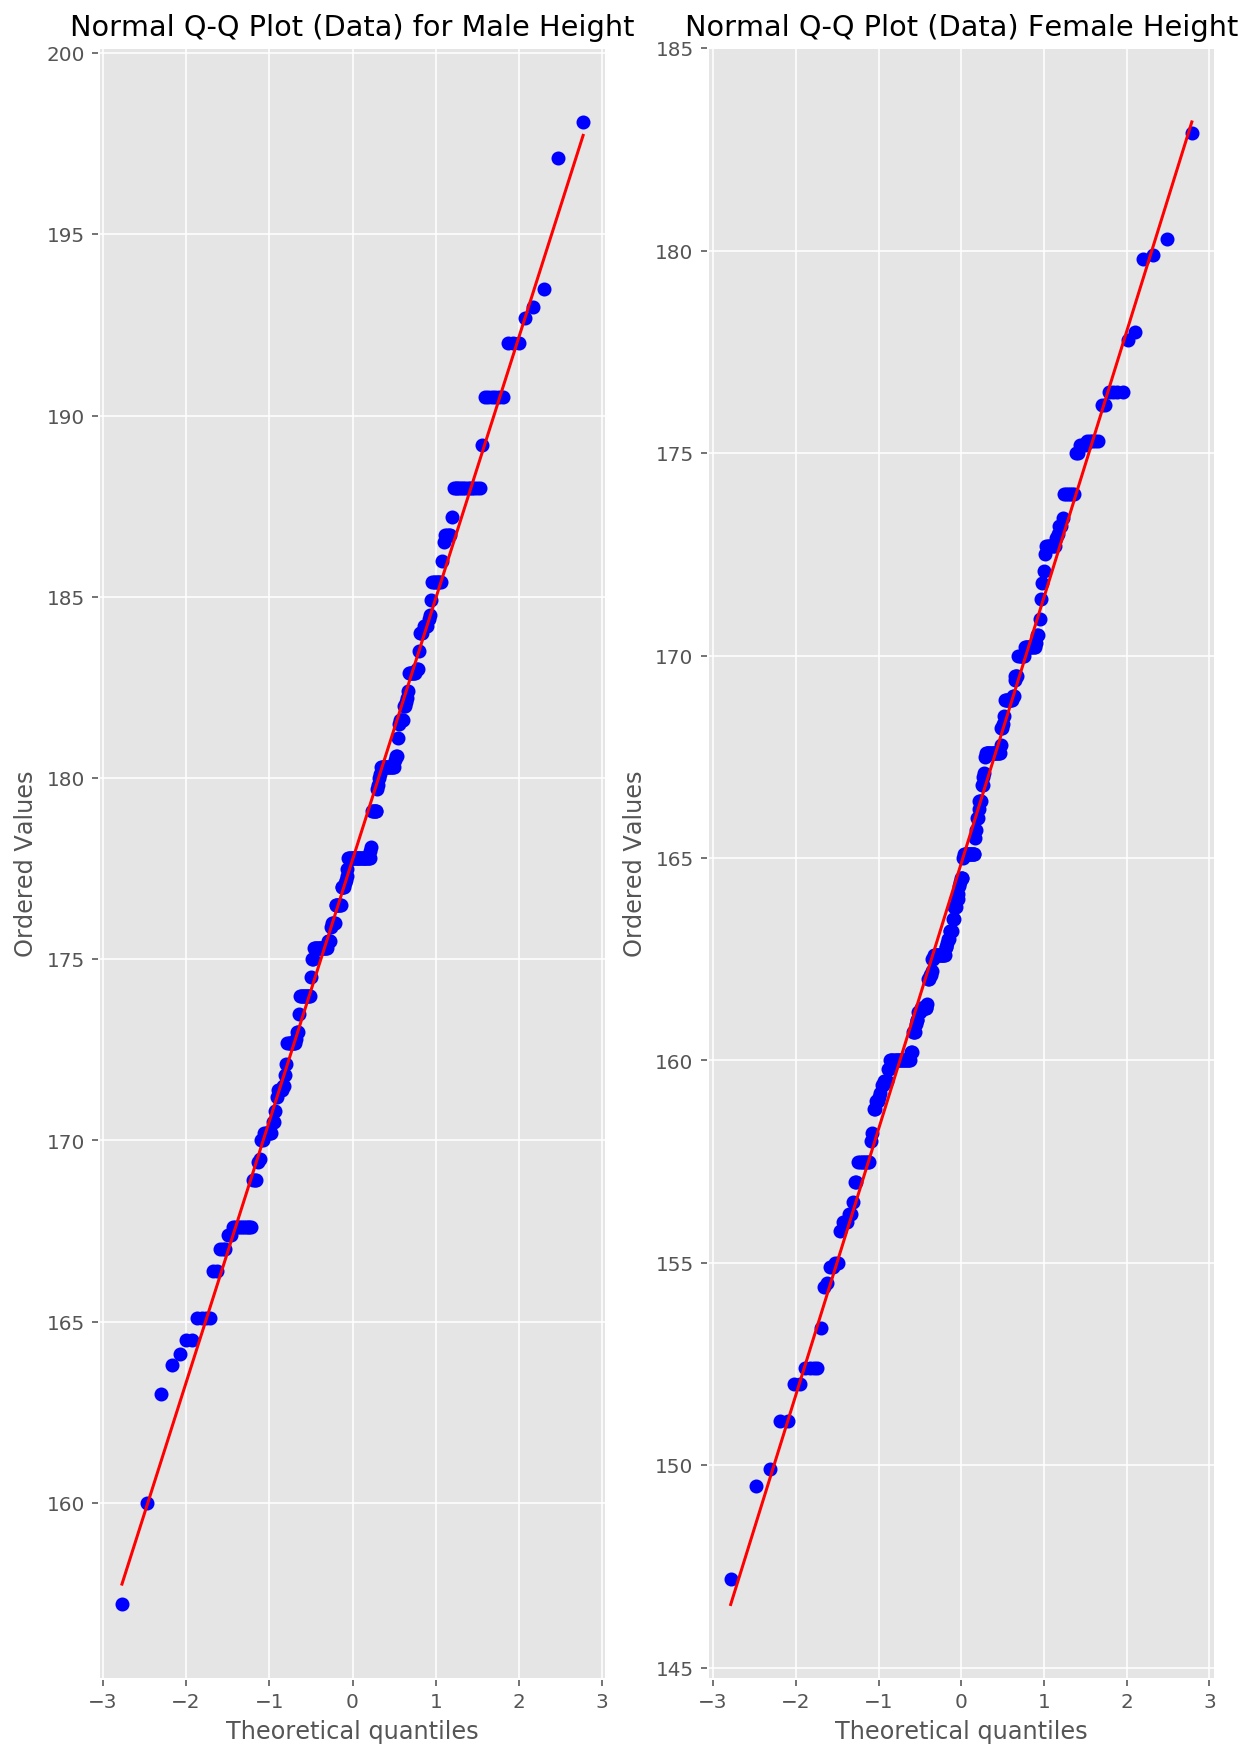

The points all approximately fall on a line.


In [0]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
probplot(mdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data) for Male Height')

plt.subplot(1, 2, 2)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data) Female Height')
plt.show()
print("The points all approximately fall on a line.")